# Análisis de datos

Se importan las librerías

In [1]:
import pandas as pd

a) se leen los datos al dataframe

In [2]:
res = pd.read_csv('DatosSeguros.csv')
res.head(3)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.9,0,yes,Caribe,16884.924
1,19,F,27.9,0,yes,Caribe,16884.924
2,19,F,27.9,0,yes,Caribe,16884.924


Descripción de los datos

In [3]:
res.describe()

,edad,imc,hijos,valor_seguro
count,1349.000000,1347.000000,1349.000000,1349.000000
mean,39.109711,30.618682,1.092661,13311.523280
std,14.071136,6.120026,1.205027,12135.346316
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4751.070000
50%,39.000000,30.300000,1.000000,9411.005000
75%,51.000000,34.600000,2.000000,16884.924000
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
res.count()

edad            1349
sexo            1349
imc             1347
hijos           1349
fumador         1347
region          1349
valor_seguro    1349
dtype: int64

## importar librebrias para graficar

In [5]:
import matplotlib.pyplot as plt

a) comparación entre el total de fumadores contra los que pagan mas por el valor del seguro

In [6]:
# personas que fuman
cuenta_fumadores = res[res['fumador'] == 'yes']
fuma = cuenta_fumadores['fumador'].count()
# cantidad de personas que no fuman
nofuma = res[res['fumador'] != 'yes']['fumador'].count()

In [7]:
print(f'fumadores: {fuma}, No fumadores: {nofuma}')

fumadores: 281, No fumadores: 1066


Text(0.5, 1.0, 'Figura 6 distribución porcentual de fumadores')

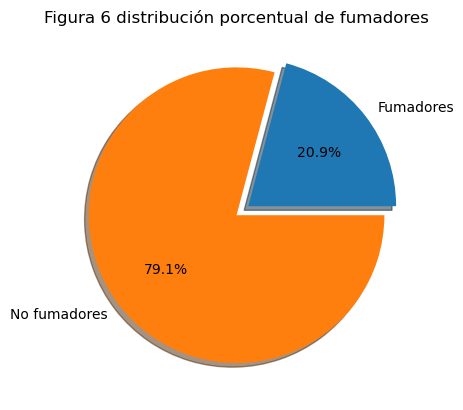

In [8]:
plt.pie(x=[fuma, nofuma], labels=['Fumadores','No fumadores'],  autopct='%1.1f%%',\
        explode=[0.1, 0], shadow=True)
plt.title('Figura 6 distribución porcentual de fumadores')

Gaficar un bloxplot donde se muestre el valor del seguro agrupado por fumadores

Text(0.5, 1.0, 'Boxplot valor por condición')

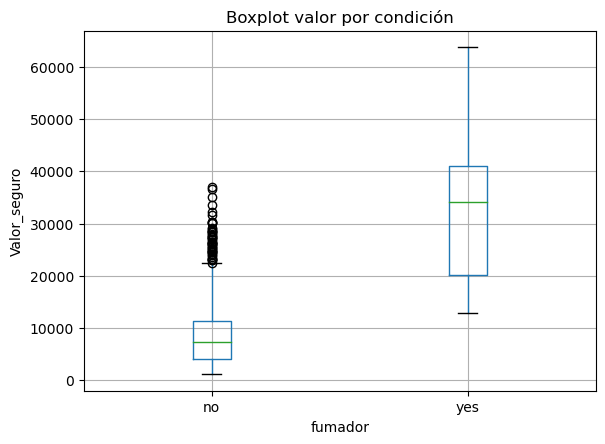

In [9]:
fig = res.boxplot("valor_seguro", by="fumador")
plt.ylabel('Valor_seguro')
plt.suptitle('')
plt.title('Boxplot valor por condición')

## Generando el heatmap

In [10]:
import seaborn as sns

In [11]:
dt = res[['valor_seguro','imc','hijos','edad']]

Compute pairwise correlation of columns

In [12]:
corr = dt.corr()

<AxesSubplot:>

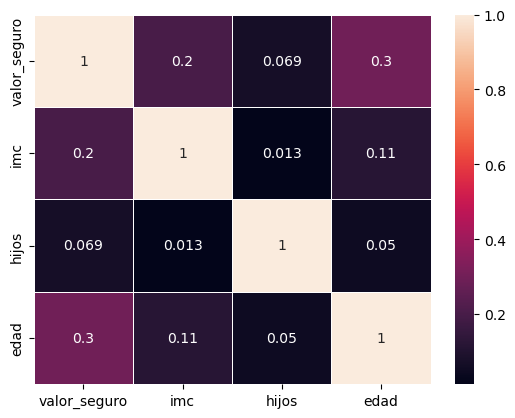

In [13]:
sns.heatmap(corr, linewidths=0.5, annot=True)


# Se busca agrupar los datos por rango de edades

## Hay que crear una columna nueva calculada

In [14]:
dt2 = res
dt2['Rango_edad'] = dt2.apply(lambda row: [[[['E','D'][row.edad < 50], 'C'][row.edad < 40], 'B'][row.edad < 30], 'A'][row.edad < 20], axis = 1)

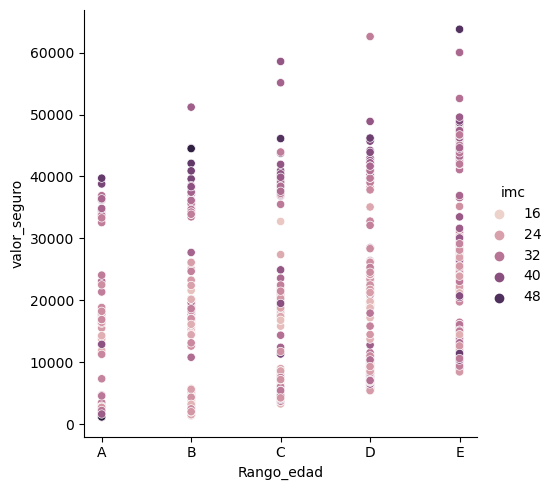

In [15]:
fig = sns.relplot(x='Rango_edad' ,y='valor_seguro',hue='imc',data=dt2)
# fig.set_titles('Figura 11. Relación tres variables: valor seguro, rango de edad y el índice de masa corporal')

<AxesSubplot:xlabel='Rango_edad', ylabel='valor_seguro'>

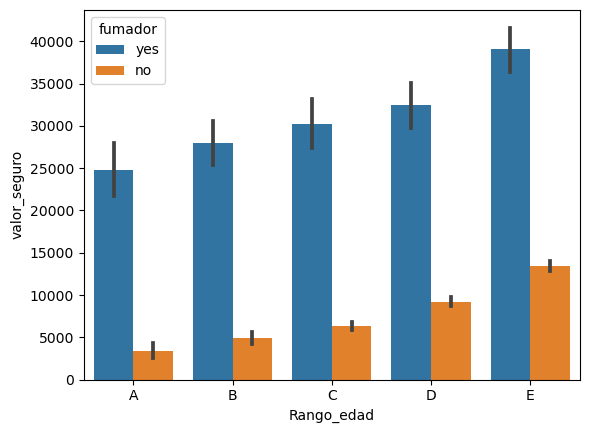

In [16]:
sns.barplot(data=dt2,x='Rango_edad',y='valor_seguro', hue='fumador')